This script takes the quantile normalized data and makes a PCA plot in R. Additionally, this script makes box plots of the distribution of PC1 and PC2 values for all three study groups (Active GCA, Inactive GCA, and Healthy controls). A Mann–Whitney U test was used to compare the PC1 and PC2 distributions between all three study groups. The P-values are provided and denoted between each group.

In [1]:
library("magrittr")
library("dplyr")
library("ggplot2")
library("stats")
library("ggfortify")
library("ggpubr")

#read in the proteomics data and the patient demographics data
#vasculitis_df <- read.csv("../../data/vasculitis_patients_final.csv")
vasculitis_demographics_df <- read.csv("../../data/vasculitis_patient_info.csv")

#read in all quantile data
all_quantile_df = read.csv("../../data/all_quantile_data.csv")
#head(all_quantile_df)
#get the number of columns and rows 
num_columns <- ncol(all_quantile_df)
num_proteins <- ncol(all_quantile_df) - 3
num_samples <- nrow(all_quantile_df)


#filter only active gca patients
active_df <- filter(all_quantile_df,all_quantile_df$Study_group == "Active")
active_demographics_df <- filter(vasculitis_demographics_df,vasculitis_demographics_df$Study_group == "Active")
active_proteins_only <- active_df[,4:num_columns]

#filter inactive gca patients
inactive_df = filter(all_quantile_df,all_quantile_df$Study_group == "Inactive")
inactive_demographics_df <- filter(vasculitis_demographics_df,vasculitis_demographics_df$Study_group == "Inactive")
inactive_proteins_only <- inactive_df[,4:num_columns]

#read in controls data
controls_demographics_df <- read.csv("../../data/controls_demographics.csv")
controls_df <- filter(all_quantile_df,all_quantile_df$Study_group == "Healthy_Control")
controls_proteins_only <- controls_df[,4:num_columns]

proteins_only <- data.frame(active_df[ ,4:num_columns])
#seperate the protein names for the linear model
protein_names <- data.frame(matrix(data=0,nrow=num_proteins,ncol=1))
colnames(protein_names) <- "Protein"
protein_names[ , 1] <- data.frame(colnames(proteins_only))
#protein_names




Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
active_proteins_df = active_df[ , 4:num_columns]
inactive_proteins_df = inactive_df[ , 4:num_columns]
healthy_control_proteins_df <- controls_df[ , 4:num_columns]
#View(healthy_control_proteins_df)
only_proteins_df <- rbind(active_proteins_df,inactive_proteins_df, healthy_control_proteins_df)
dim(only_proteins_df)
#View(only_proteins_df)

pca1_vals <- prcomp(only_proteins_df, scale. = FALSE)

all_samples_df <- rbind(active_df,inactive_df, controls_df)

[1]   90 7289

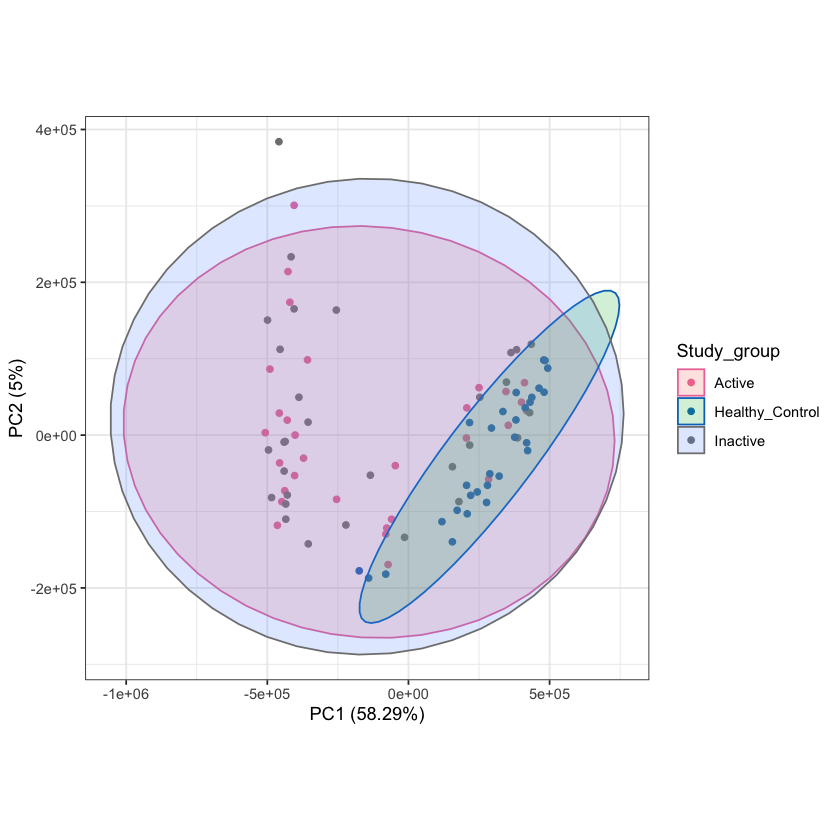

In [3]:
PCA_plot <- autoplot(pca1_vals, data = all_samples_df, scale = 0, colour = 'Study_group', frame.type = 'norm', title = "PCA between Active/Inactive and healthy control")+theme_bw()+
            scale_color_manual(values = c("#ec78a7","#0073c2","#7f7f7f")) +theme(aspect.ratio = 1)  #+  coord_fixed() # Aspect ratio of 1
PCA_plot
##efc000

In [44]:
pdf("../../analysis/Figure_1B_C_D/PCA_all_samples_after_quantile_normalization.pdf", width=10, height=10)
print(PCA_plot)
dev.off()

pdf 
  2

Now, I will compare the PC1 values for all study groups:
1. Active GCA vs. Healthy controls
2. Inactive GCA vs. Healthy controls
3. Active GCA vs. Inactive GCA

In [4]:
head(pca1_vals$x)
all_PC1 = data.frame(pca1_vals$x[,1])
dim(all_PC1)

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90
-254587.3,-84049.842,64610.02,-37071.048,5425.450,-117404.64,67372.032,-32022.4723,29863.41,-16378.08,⋯,1902.419,16691.295,-1399.718,-20596.5717,-5213.520,9016.6822,-9170.1399,-1015.307,4037.636,7.248198e-10
345480.6,56994.123,-52887.51,-118859.945,-21061.576,-115772.71,-27861.301,116178.2788,-138663.84,-103082.31,⋯,-8082.216,-5685.151,-11346.791,-5349.1191,-5947.263,8196.9394,-6182.0318,-12978.865,-9350.260,1.557788e-10
250060.2,62084.876,53730.38,-47308.532,-53801.691,-101539.53,52915.119,98922.7411,-35511.59,-30618.20,⋯,7561.473,10911.823,7729.974,10050.6228,5685.247,-10838.4465,7816.3048,18564.983,15031.217,4.036456e-10
400474.8,43048.081,75222.94,19633.198,-5438.396,21834.14,9300.285,16139.4479,44152.48,-16164.26,⋯,-13502.135,8000.526,4290.160,-987.6083,-11853.768,1608.0412,3423.1718,5360.488,-14349.745,2.847790e-10
205162.3,-3789.781,122542.72,-7453.558,-42763.971,-74824.55,23539.961,910.4708,13579.82,63660.08,⋯,-20229.852,11204.638,-4771.227,2354.8358,-7438.021,-138.3961,-883.8927,-3364.875,4645.267,3.360389e-10
-59704.2,-110100.676,68626.26,-23849.139,-48330.630,-180630.11,15430.124,6760.5876,70101.67,-48335.63,⋯,23505.353,5924.339,-12086.628,1552.5506,2580.209,11772.5751,36290.1330,-4410.231,-13245.162,4.966240e-10


[1] 90  1

In [5]:
active_pc1 = data.frame(all_PC1[1:30,])
colnames(active_pc1) = "PC1"
active_pc1$Index = "1"
inactive_pc1 = data.frame(all_PC1[31:60,])
colnames(inactive_pc1) = "PC1"
inactive_pc1$Index = "3"
control_pc1 = data.frame(all_PC1[61:90,])
colnames(control_pc1) = "PC1"
control_pc1$Index = "5"
all_pc1_to_plot = rbind(active_pc1,inactive_pc1,control_pc1)

In [8]:
# Perorm pairwise comparisons for Active vs Inactive
active_and_inactive_pc1 = filter(all_pc1_to_plot,all_pc1_to_plot$Index == "1" | all_pc1_to_plot$Index == "3")
compare_means(PC1 ~ Index,  data = active_and_inactive_pc1, paired = TRUE)

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
PC1,1,3,0.730342,0.73,0.73,ns,Wilcoxon


In [9]:
# Perorm pairwise comparisons for Active vs healthy controls
active_and_healthy_controls_pc1 = filter(all_pc1_to_plot,all_pc1_to_plot$Index == "1" | all_pc1_to_plot$Index == "5")
compare_means(PC1 ~ Index,  data = active_and_healthy_controls_pc1)

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
PC1,1,5,2.44571e-06,2.4e-06,2.4e-06,****,Wilcoxon


In [10]:
# Perorm pairwise comparisons for Inactive vs healthy controls
inactive_and_healthy_controls_pc1 = filter(all_pc1_to_plot,all_pc1_to_plot$Index == "3" | all_pc1_to_plot$Index == "5")
compare_means(PC1 ~ Index,  data = inactive_and_healthy_controls_pc1)

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
PC1,3,5,5.755125e-06,5.8e-06,5.8e-06,****,Wilcoxon


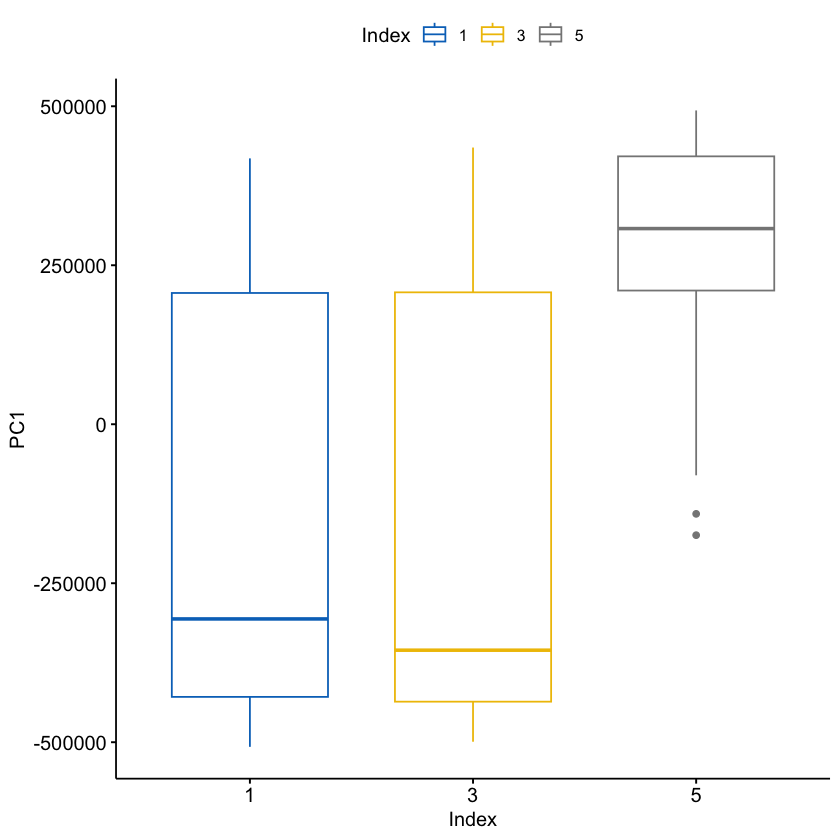

In [6]:
boxplots_of_PC1_with_pvalues = ggboxplot(all_pc1_to_plot, x = "Index", y = "PC1",color = "Index", palette = "jco")
                               
print(boxplots_of_PC1_with_pvalues)

In [25]:
#save the plot
pdf("../../analysis/Figure_1B_C_D/box_plot_of_PC1_distributions.pdf", width = 3, height = 10)
print(boxplots_of_PC1_with_pvalues)
dev.off()

pdf 
  2

Now, I will compare the PC2 values for all study groups:
1. Active GCA vs. Healthy controls
2. Inactive GCA vs. Healthy controls
3. Active GCA vs. Inactive GCA

In [11]:
all_PC2 = data.frame(pca1_vals$x[,2])
active_pc2 = data.frame(all_PC2[1:30,])
colnames(active_pc2) = "PC2"
active_pc2$Index = "1"
inactive_pc2 = data.frame(all_PC2[31:60,])
colnames(inactive_pc2) = "PC2"
inactive_pc2$Index = "3"
control_pc2 = data.frame(all_PC2[61:90,])
colnames(control_pc2) = "PC2"
control_pc2$Index = "5"
all_pc2_to_plot = rbind(active_pc2,inactive_pc2,control_pc2)

In [14]:
# Perorm pairwise comparisons for Active vs Inactive
active_and_inactive_pc2 = filter(all_pc2_to_plot,all_pc2_to_plot$Index == "1" | all_pc2_to_plot$Index == "3")
compare_means(PC2 ~ Index,  data = active_and_inactive_pc2, paired = TRUE)

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
PC2,1,3,0.3284699,0.33,0.33,ns,Wilcoxon


In [16]:
# Perorm pairwise comparisons for Active vs healthy controls
active_and_healthy_controls_pc2 = filter(all_pc2_to_plot,all_pc2_to_plot$Index == "1" | all_pc2_to_plot$Index == "5")
compare_means(PC2 ~ Index,  data = active_and_healthy_controls_pc2)

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
PC2,1,5,0.3737551,0.37,0.37,ns,Wilcoxon


In [17]:
# Perorm pairwise comparisons for Inactive vs healthy controls
inactive_and_healthy_controls_pc2 = filter(all_pc2_to_plot,all_pc2_to_plot$Index == "3" | all_pc2_to_plot$Index == "5")
compare_means(PC2 ~ Index,  data = inactive_and_healthy_controls_pc2)

.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
PC2,3,5,0.1381261,0.14,0.14,ns,Wilcoxon


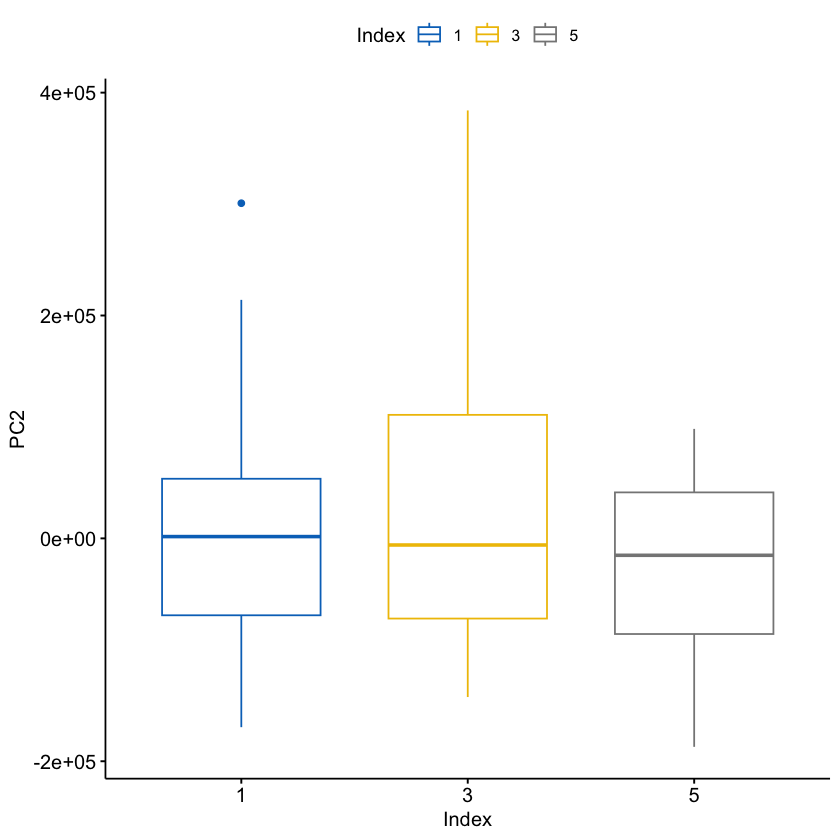

In [12]:
boxplots_of_PC2_with_pvalues = ggboxplot(all_pc2_to_plot, x = "Index", y = "PC2",color = "Index", palette = "jco")

print(boxplots_of_PC2_with_pvalues)

In [23]:
#save the plot
pdf("../../analysis/Figure_1B_C_D/box_plot_of_PC2_distributions.pdf", width = 3, height = 10)
print(boxplots_of_PC2_with_pvalues)
dev.off()

pdf 
  2